In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# List of attack types and BENIGN
attack_types = ["Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator",
                "Heartbleed", "Infiltration", "PortScan", "SSH-Patator", "Web Attack - Brute Force",
                "Web Attack - Sql Injection", "Web Attack - XSS"]
benign_type = "BENIGN"

# Function for feature selection and importance list creation
def perform_feature_selection(data):
    # Strip spaces from column names
    data.columns = data.columns.str.strip()
    
    X = data.drop(columns=["Label"])
    y = data["Label"].apply(lambda x: 1 if x != benign_type else 0)
    
    clf = RandomForestRegressor(n_estimators=100, random_state=42)
    clf.fit(X, y)
    
    importances = clf.feature_importances_
    return importances

# Iterate over attack types
for attack_type in attack_types:
    # Load the attack vs. benign file
    input_filename = f"/Users/vidyakalyandurg/Desktop/EECE5644_Threat_Detection/ATTACK_DATA/{attack_type}_vs_{benign_type}.csv"
    attack_data = pd.read_csv(input_filename, low_memory=False)
    
    # Strip spaces from column names right after loading
    attack_data.columns = attack_data.columns.str.strip()

    # Perform feature selection
    importances = perform_feature_selection(attack_data)

    # Create a DataFrame for importance list
    importance_df = pd.DataFrame({"Feature": attack_data.drop(columns=["Label"]).columns,
                                  "Importance": importances})
    
    # Calculate the percentage of importance for each feature
    total_importance = importance_df["Importance"].sum()
    importance_df["Percentage"] = importance_df["Importance"] / total_importance * 100
    
    # Sort the DataFrame by importance in descending order
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    
    # Print the top 20 features and their percentages
    print(f"\nTop 20 features and their percentages for {attack_type}:")
    print(importance_df.head(20))
    
    # Save the importance list to a CSV file
    importance_filename = f"{attack_type}_importance.csv"
    importance_df.to_csv(importance_filename, index=False)
    print(f"Saved importance list for {attack_type}")
    
    # Create a bar plot for the top 20 features' importances
    plt.figure(figsize=(10, 6))
    top_20_df = importance_df.head(20)
    top_20_df.plot(kind="bar", x="Feature", y="Importance", legend=None)
    plt.title(f"Feature Importance for {attack_type}")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("Feature selection and visualization completed for all attack types.")

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

KeyboardInterrupt: 


Top 20 features and their percentages for combined_data:
                         Feature  Importance  Percentage
67       Init_Win_bytes_backward    0.056037    5.603666
4    Total Length of Fwd Packets    0.044758    4.475844
63             Subflow Fwd Bytes    0.043327    4.332718
65             Subflow Bwd Bytes    0.038113    3.811337
42        Packet Length Variance    0.035042    3.504201
5    Total Length of Bwd Packets    0.030784    3.078381
0               Destination Port    0.030508    3.050827
39             Max Packet Length    0.026905    2.690526
37                 Bwd Packets/s    0.026656    2.665642
54          Avg Bwd Segment Size    0.025712    2.571242
52           Average Packet Size    0.024341    2.434110
6          Fwd Packet Length Max    0.022961    2.296078
62           Subflow Fwd Packets    0.021685    2.168500
12        Bwd Packet Length Mean    0.021199    2.119852
35             Bwd Header Length    0.021170    2.117004
40            Packet Length Me

<Figure size 1000x600 with 0 Axes>

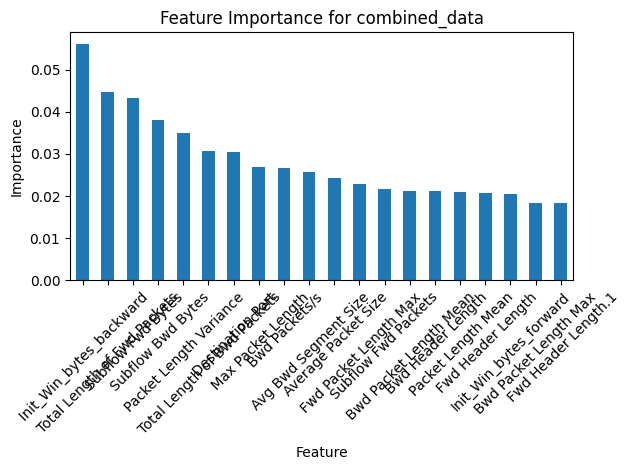

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

combined_data = pd.read_csv("combined_data.csv")
def perform_feature_selection(data):
    X = data.drop(columns=[" Label"])
    y = data[" Label"].apply(lambda x: 1 if x != "BENIGN" else 0)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    
    feature_importances = clf.feature_importances_
    return feature_importances
# Perform feature selection on the combined_data file
importance_list = perform_feature_selection(combined_data)

# Create a DataFrame for importance list
importance_df = pd.DataFrame({"Feature": combined_data.drop(columns=[" Label"]).columns,
                              "Importance": importance_list})

# Calculate the percentage of importance for each feature
total_importance = importance_df["Importance"].sum()
importance_df["Percentage"] = importance_df["Importance"] / total_importance * 100

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print the top 20 features and their percentages
print("\nTop 20 features and their percentages for combined_data:")
print(importance_df.head(20))

# Save the importance list to a CSV file
importance_filename = "combined_data_importance.csv"
importance_df.to_csv(importance_filename, index=False)
print("Saved importance list for combined_data")

# Create a bar plot for the top 20 features' importances
plt.figure(figsize=(10, 6))
top_20_df = importance_df.head(20)
top_20_df.plot(kind="bar", x="Feature", y="Importance", legend=None)
plt.title("Feature Importance for combined_data")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()